# Part II - Airline Passenger Satisfaction
    By Joy Joseph

## Investigation Overview

> Customer's satisfaction is a major factor to any successful business. In many industries, satisfing customers
could mean that few customers are dissatisfied, hence helps to reduce the cost of failures. In the aviation industry known to be highly competitive, maintaing an excellent service is an edge.  In order to analyze Airline Passenger Satisfaction related to the service provided by the airlines we will answer some questions.

> 1. What is the percentage of Airline Passenger who are Satisfied or Neutral/Dissatisfied?

> 2. What is the distribution of each variable?

> 3. What is the relationships between features in the dataset?


## Dataset Overview

> The provided dataset was collected from [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). There are 129,880 survey entries and passenger/flight details from a US airline with 24 features. Most variables are numeric, and few being categorical in nature.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset into a pandas dataframe
df = pd.read_csv("C://Users//USER//Desktop//Udacity//Project3//Project Template//airline_passenger_satisfaction.csv")

In [3]:
# checking for missing values
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [4]:
# dropping missing values
df =df.dropna()
df.isnull().any().sum()

0

## 1. What is the percentage of Airline Passenger who are Satisfied or Neutral/Dissatisfied?

The Distribution of Airline Passengers shows that among the 129,880 Airline Passengers, 56.6%  are Neutral or Dissatisfied while 43.4% are satisfied.

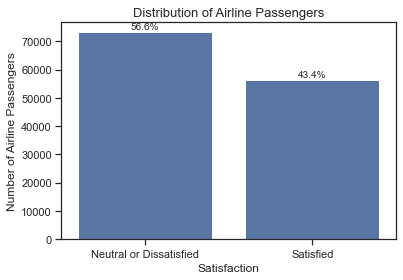

In [5]:
# plotting a bar chat to see Distribution of Airline Passengers
ax = sb.countplot(data = df, 
                   x = 'Satisfaction',
                 color = 'b')
                   
# displaying percentage 
lenght = len(df)
for i in ax.patches:
    percentage = f'{100 * i.get_height() / lenght:.1f}%\n'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'center')

# plot labels
plt.xlabel('Satisfaction')
plt.ylabel('Number of Airline Passengers')
plt.title('Distribution of Airline Passengers', size = 13)
plt.show()

## 2. What is the distribution of each variable? 

To answer this, features will be divided into 3 columns:  The rated columns which contains rated values of Airline passengers, Numerical colums, and categorical columns. 

The ratings are from 0-5, 0 being the lowest raing and 5 being the highest.
We see that Airline service with the highest ratings of 4 and 5 are In-flight Service, Baggage Handling, follwed by On-board Service, Seat Comfort, Online Boarding, Leg Room Service, Cleanliness, In-flight Entertainment, Departure and Arrival Time Convenience and Check-in Service. On the other hand, Airline service with the lowest ratings of 2 and 3 are In-flight Wifi Service, Ease of Online Booking. 

The categorical column plots shows that the Percentage Distribution of Airline Passengers is more for female, Returing customers, Business purpose and Business-Class than the rest. This means that, the Distribution of Airline Passengers is 50.74% female, 81.69% Returning customers, 69.08% for Business purpose and 47.87% Business-Class type compared to the rest.

The plots with numerical columns, shows that the Percentage Distribution of Airline Passengers by their age is more around 20 - 50 than the rest.

<AxesSubplot:xlabel='Class', ylabel='Arrival Delay'>

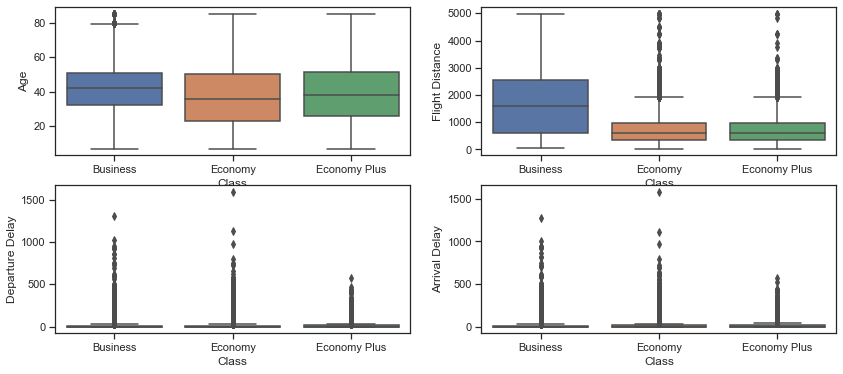

In [6]:
# ploting matrix of numeric features against categorical features.
fig, ax = plt.subplots(2,2, figsize=(14,6))

sns.boxplot(data=df,x='Class',y='Age',ax=ax[0, 0])
sns.boxplot(data=df,x='Class',y='Flight Distance',ax=ax[0, 1])
sns.boxplot(data=df,x='Class',y='Departure Delay',ax=ax[1, 0])
sns.boxplot(data=df,x='Class',y='Arrival Delay',ax=ax[1, 1]) 


## 3. What is the relationships between features in the dataset?

The correlation plot shows that, there is little or no correlation between Airline passener Age and flight distance, however, it shows a high correlation between Airline Departure Delay and Arrival Delay. This implies a linear relationship between them.
The correlation between Departure Delay and Arrival Delay is very high. Age and Flight Distance don't have strong correlations with any other numeric variables in the dataset.

In the Bi-variate analyses between rated values and Satisfaction, Airlines Service Ratings are from 0-5. Airline Passenger rate the service by their satisfaction, Neutral or dissatisfied level. The relationship here is a positive one which implies that as Airline passengers rating goes up, the level of satisfaction goes up and vise versal.

It is interesting to note that there are some positive relationships between the categorical variables and numeric variables of interest.The plot shows that Airline passengers who are younger tend to choose Economy-Class more while the middle age tend to choose Economy plus-Class and the older people tend to choose Business-Class. And Business-Class Passengers are more comfortable with longer flight distance. There doesn't seem to be that much interaction between Gender and Customer Type of Airline Passenger, there seems to be some interaction between the Type of Travel and Customer Type of Airline Passenger, as the numbers of Airline Passenger for business reasons is more with the Business class than the Economy Class, the numbers of Airline Passenger for personal reasons is more for Economy Class than the rest.

<AxesSubplot:>

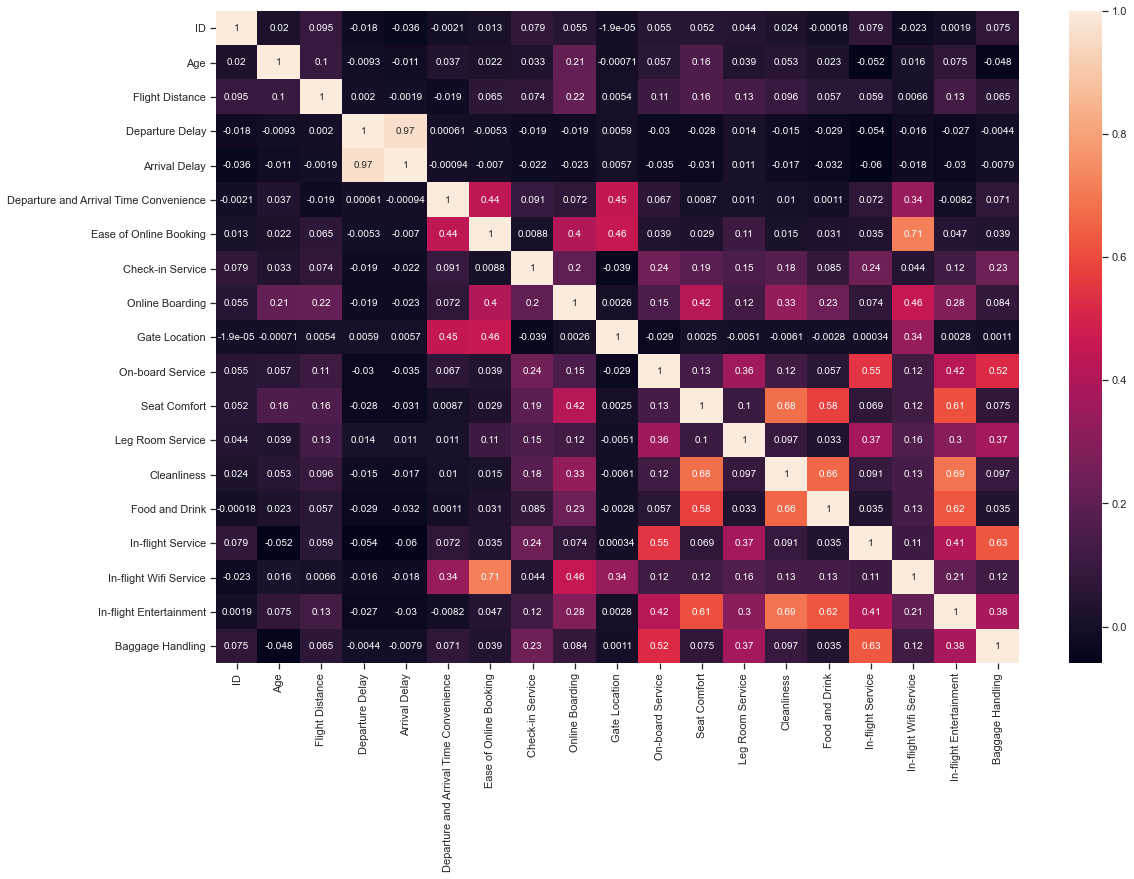

In [7]:
# plotting a correlation plot to see relationships among all features
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot = True)

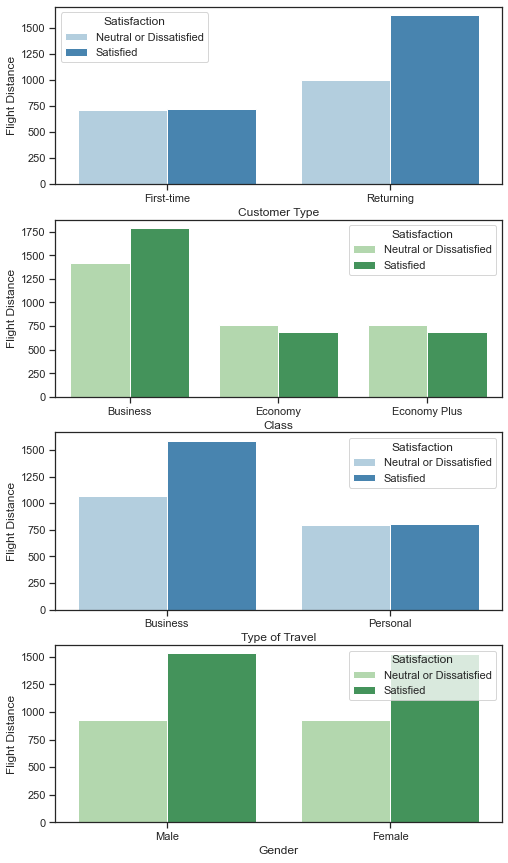

In [8]:
# plotting relationships between the four categorical features.
plt.figure(figsize = [8, 15])

# subplot 1: Flight Distance by Customer Type
plt.subplot(4, 1, 1)
sns.barplot(data=df, x = 'Customer Type', y = 'Flight Distance', hue = 'Satisfaction', palette = 'Blues', ci=None)

# subplot 2: Flight Distance by Class
ax = plt.subplot(4, 1, 2)
sns.barplot(data=df, x = 'Class', y = 'Flight Distance', hue = 'Satisfaction', palette = 'Greens', ci=None)

# subplot 3: Flight Distance by Type of Travel
ax = plt.subplot(4, 1, 3)
sns.barplot(data=df, x = 'Type of Travel', y = 'Flight Distance', hue = 'Satisfaction', palette = 'Blues', ci=None)


# subplot 4: Flight Distance by Gender
ax = plt.subplot(4, 1, 4)
sns.barplot(data=df, x = 'Gender', y = 'Flight Distance', hue = 'Satisfaction', palette = 'Greens', ci=None)

plt.show()

In [9]:
!jupyter nbconvert Airline_Passenger_Satisfaction_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Airline_Passenger_Satisfaction_Part2.ipynb to slides
[NbConvertApp] Writing 919837 bytes to Airline_Passenger_Satisfaction_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\USER\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\USER\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_noteb